In [3]:
####************************************************************************************************
###  Feature Selection with model
###  For models like Logistic Reg / SVM the co-efficients tells us the feature importance
###  For tree based model we get feature importance in place of co-efficients
###  We remove the feature which has a co-efficient close to 0
###  the co-efficient are more positive if they are important for positive class & more negative
###  if they are more important to negative class
####************************************************************************************************

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [9]:
X, y =  load_diabetes(return_X_y=True, as_frame=True)
print(X.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [10]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

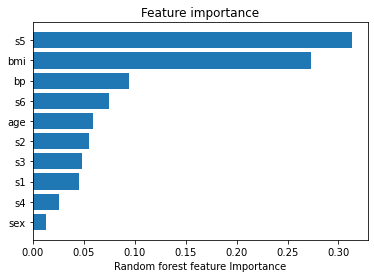

In [13]:
importance = model.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature importance")
plt.barh(range(len(idxs)),importance[idxs],align='center')
plt.yticks(range(len(idxs)),[X.columns.to_list()[i] for i in idxs])
plt.xlabel('Random forest feature Importance')
plt.show()

In [ ]:
### Approach 2
### SelectFromModel builtin from Sklearn
###
###
###
###

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel

In [5]:
X, y =  load_diabetes(return_X_y=True, as_frame=True)
print(X.head())
model = RandomForestRegressor()

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [6]:
sfm = SelectFromModel(estimator=model)
X_trasnsformed = sfm.fit_transform(X,y)
print(X.columns[sfm.get_support(indices=True)])

Index(['bmi', 's5'], dtype='object')


In [ ]:
### points to remember
###  